In [63]:
import numpy as np

pca_input = []
for j in range(9,10):
    try:
        for i in range(10):
            path = f'weights/round-{j}-client-client{i}.npz'
            with np.load(path, allow_pickle=True) as data:
                # Extract arrays from .npz file
                weights = [data[key] for key in data]

            output = weights[-2].reshape(1,128)
            pca_input.extend(output)
    except:
        pass

In [64]:
pca_input = np.array(pca_input)
pca_input.shape

(10, 128)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


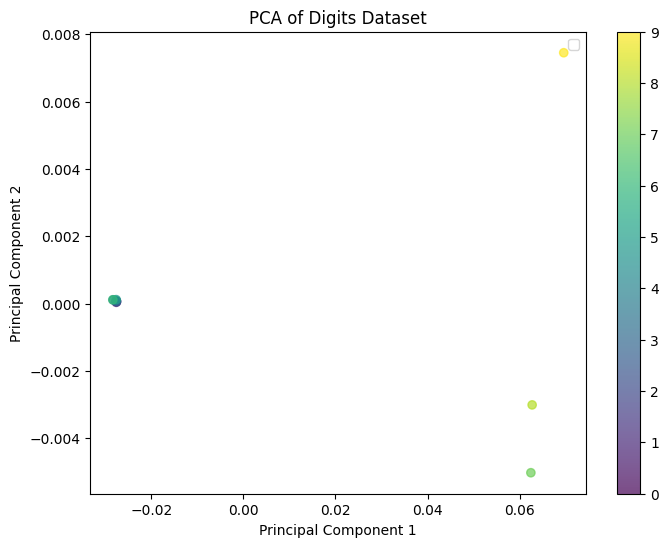

In [67]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA(n_components=5)
pca_out = pca.fit_transform(pca_input)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_out[:, 0], pca_out[:, 1], c=[i for i in range(10)], cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Digits Dataset')
plt.legend()
plt.show()


/tmp/ipykernel_990128/1201562514.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_labels))


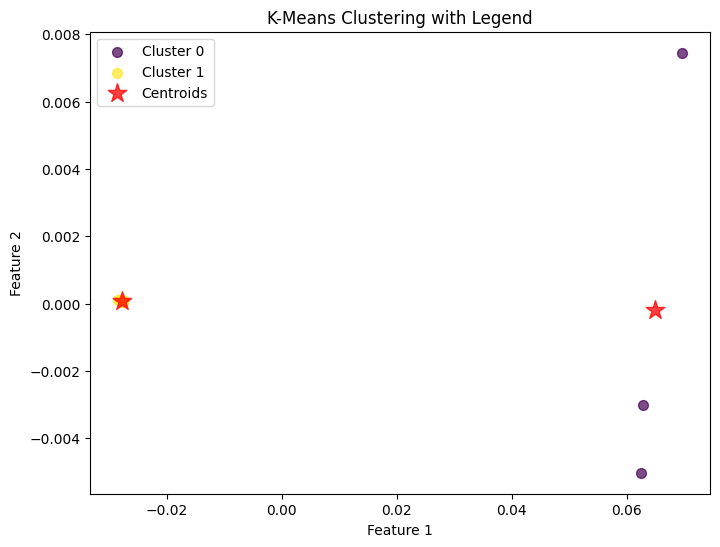

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


# 2. Apply K-Means clustering
kmeans = KMeans(n_clusters=2, max_iter=100)
kmeans.fit(pca_out)

# 3. Get the cluster labels
labels = kmeans.labels_

# 4. Get the cluster centers
centers = kmeans.cluster_centers_


# Create a scatter plot with cluster labels
plt.figure(figsize=(8, 6))
unique_labels = np.unique(labels)
colors = plt.cm.get_cmap('viridis', len(unique_labels))

for label in unique_labels:
    plt.scatter(pca_out[labels == label, 0], pca_out[labels == label, 1], 
                color=colors(label), label=f'Cluster {label}', s=50, alpha=0.7)

# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='*', label='Centroids')

# Add legend
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with Legend')
plt.show()


In [54]:
from collections import Counter
print(Counter(labels))

Counter({0: 49, 1: 20})


Inertia: 0.04373036537167839
Silhouette Score: 0.623226510535468
Calinski-Harabasz Index: 120.0651532372493
Davies-Bouldin Index: 0.6386848803595786


/tmp/ipykernel_990128/1979234125.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_labels))


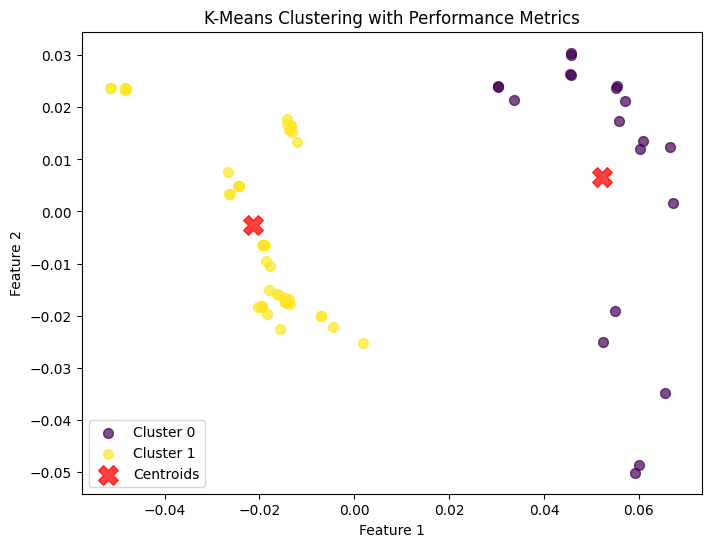

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(pca_out)

# Get the cluster labels
labels = kmeans.labels_

# Measure performance
# Inertia
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

# Silhouette Score
silhouette_avg = silhouette_score(pca_out, labels)
print(f"Silhouette Score: {silhouette_avg}")

# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(pca_out, labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(pca_out, labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")

# Visualize the results
plt.figure(figsize=(8, 6))
unique_labels = np.unique(labels)
colors = plt.cm.get_cmap('viridis', len(unique_labels))

for label in unique_labels:
    plt.scatter(pca_out[labels == label, 0], pca_out[labels == label, 1], 
                color=colors(label), label=f'Cluster {label}', s=50, alpha=0.7)

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

# Add legend
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with Performance Metrics')
plt.show()


In [56]:
# Compute the Voronoi diagram based on the cluster centers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial import Voronoi, voronoi_plot_2d


vor = Voronoi(centers)

# Plot the Voronoi diagram
plt.figure(figsize=(8, 6))
voronoi_plot_2d(vor, ax=plt.gca(), show_vertices=False, line_colors='orange', line_width=2)

# Plot the clustered data points
unique_labels = np.unique(labels)
colors = plt.cm.get_cmap('viridis', len(unique_labels))

for label in unique_labels:
    plt.scatter(pca_out[labels == label, 0], pca_out[labels == label, 1], 
                color=colors(label), label=f'Cluster {label}', s=50, alpha=0.7)

# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

# Add legend
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with Voronoi Diagram')
plt.show()


QhullError: QH6214 qhull input error: not enough points(2) to construct initial simplex (need 12)

While executing:  | qhull v Qz Qc Qbb Qx
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 1736740019  voronoi  Qz-infinity-point  Qcoplanar-keep  Qbbound-last
  Qxact-merge  _zero-centrum  Qinterior-keep  Q3-no-merge-vertices-dim-high
  _maxoutside  0


In [47]:
centers = kmeans.cluster_centers_

# Ensure unique cluster centers by adding a small jitter if necessary
unique_centers = np.unique(centers, axis=0)
if len(unique_centers) < len(centers):
    centers += np.random.normal(scale=1e-4, size=centers.shape)

# Compute the Voronoi diagram based on the cluster centers
vor = Voronoi(centers)

# Plot the Voronoi diagram
plt.figure(figsize=(8, 6))
voronoi_plot_2d(vor, ax=plt.gca(), show_vertices=False, line_colors='orange', line_width=2)

# Plot the clustered data points
unique_labels = np.unique(labels)
colors = plt.cm.get_cmap('viridis', len(unique_labels))

for label in unique_labels:
    plt.scatter(pca_out[labels == label, 0], pca_out[labels == label, 1], 
                color=colors(label), label=f'Cluster {label}', s=50, alpha=0.7)

# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

# Add legend
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with Voronoi Diagram')
plt.show()

QhullError: QH6214 qhull input error: not enough points(2) to construct initial simplex (need 7)

While executing:  | qhull v Qz Qc Qbb Qx
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 1732319778  voronoi  Qz-infinity-point  Qcoplanar-keep  Qbbound-last
  Qxact-merge  _zero-centrum  Qinterior-keep  _maxoutside  0
